In [1]:
import zipfile
import json
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('copy_on_write', True)

waggle_data = []
path = "/mnt/trove/wdd/wdd_output_2024/cam0/2024/8/2024-08-28.zip"
with zipfile.ZipFile(path, "r") as archive:
    for info in archive.infolist():
        filepath = info.filename
        if filepath.endswith("waggle.json"):
            with archive.open(filepath) as file:
                json_data = json.load(file)
                waggle_data.append(json_data)

df = pd.DataFrame(waggle_data)

In [2]:
waggles_df = df.loc[df["predicted_class_label"] == "waggle"]
waggles_df["waggle_angle_deg"] = (waggles_df.waggle_angle.values * 180 / np.pi) % 360

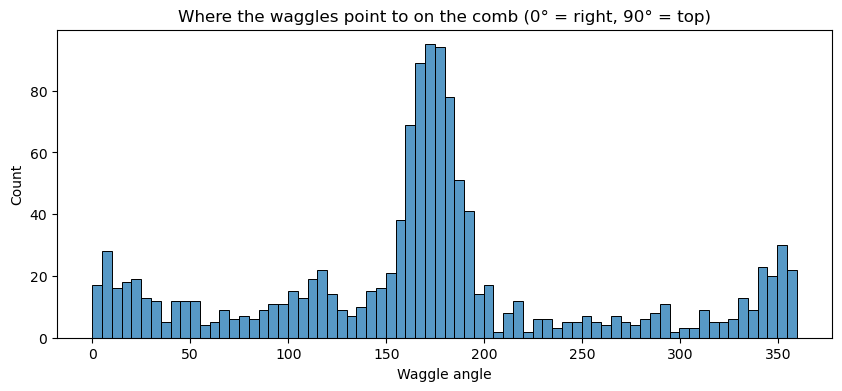

In [3]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.histplot(
    waggles_df.waggle_angle_deg.values,
    binwidth=5,
    label="Waggles",
)
plt.title("Where the waggles point to on the comb (0° = right, 90° = top)")
plt.xlabel("Waggle angle")
plt.show()

In [4]:
waggles_df["timestamp_begin"] = pd.to_datetime(waggles_df["timestamp_begin"], utc=True)
waggles_df_sorted = waggles_df.sort_values(by="timestamp_begin")

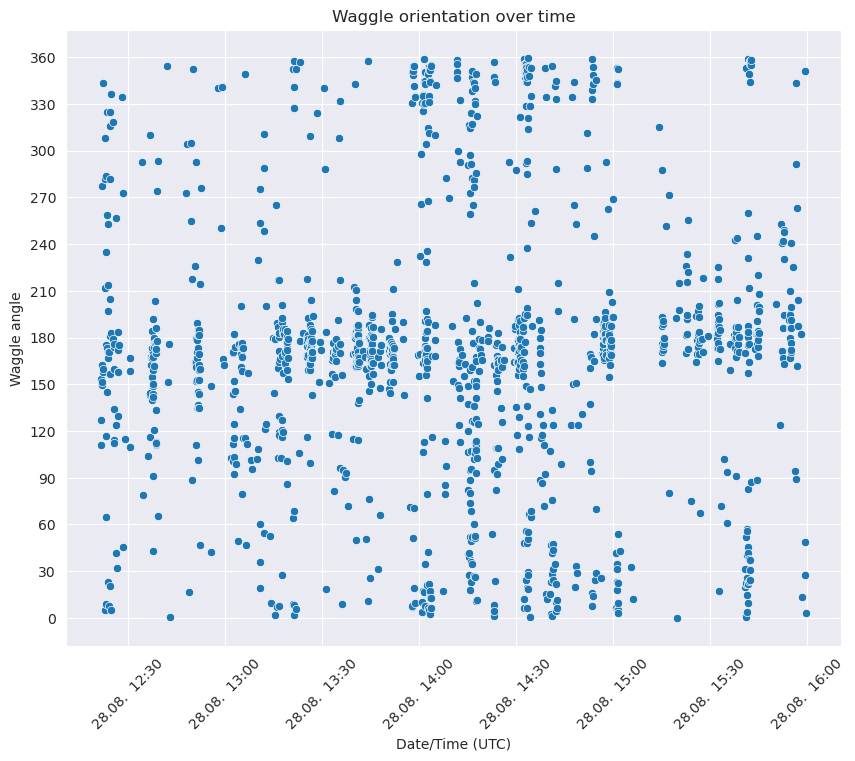

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.set_style("darkgrid")
sns.scatterplot(data=waggles_df_sorted, x="timestamp_begin", y="waggle_angle_deg")
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d.%m.  %H:%M"))
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(30))
plt.xticks(rotation=45)
plt.xlabel("Date/Time (UTC)")
plt.ylabel("Waggle angle")
plt.title("Waggle orientation over time")
plt.show()

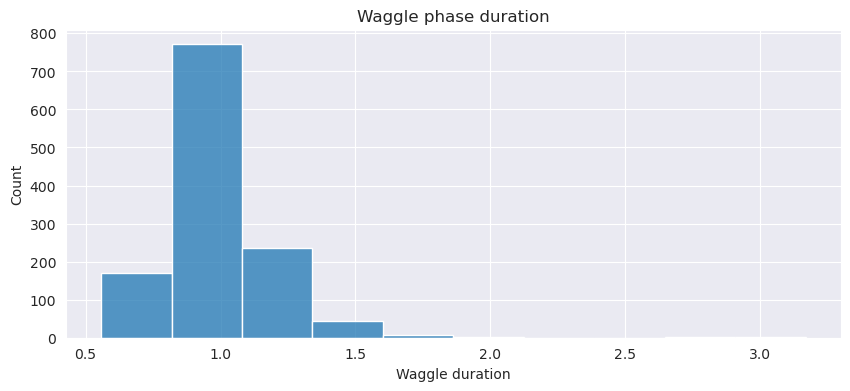

In [6]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.histplot(waggles_df.waggle_duration.values, binwidth=0.25)
plt.xlabel("Waggle duration")
plt.title("Waggle phase duration")
plt.show()

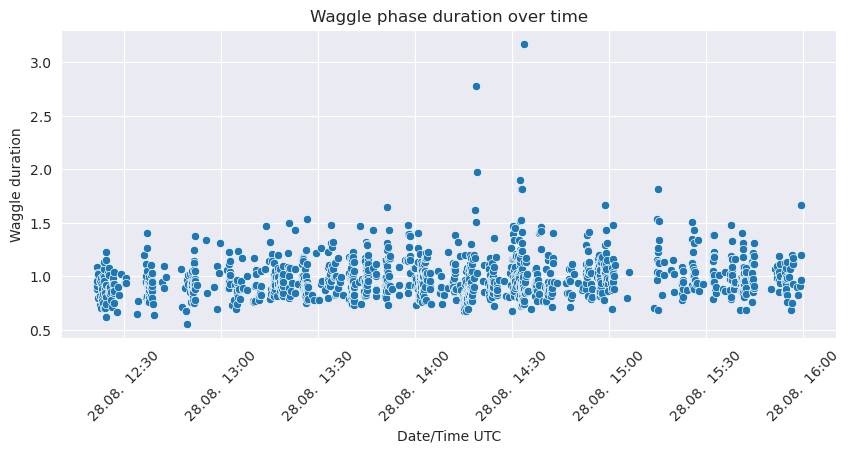

In [7]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.scatterplot(data=waggles_df_sorted, x="timestamp_begin", y="waggle_duration")
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d.%m.  %H:%M"))
plt.xticks(rotation=45)
plt.xlabel("Date/Time UTC")
plt.ylabel("Waggle duration")
plt.title("Waggle phase duration over time")
plt.show()